In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [10]:
news=fetch_20newsgroups()
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [13]:
train=fetch_20newsgroups(subset='train',categories=news.target_names)
test=fetch_20newsgroups(subset='test',categories=news.target_names)

In [17]:
train.target

array([7, 4, 4, ..., 3, 1, 8], dtype=int64)

In [18]:
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [19]:
#Creating labels for test data
labels=model.predict(test.data)

Text(91.67999999999999, 0.5, 'Predicted label')

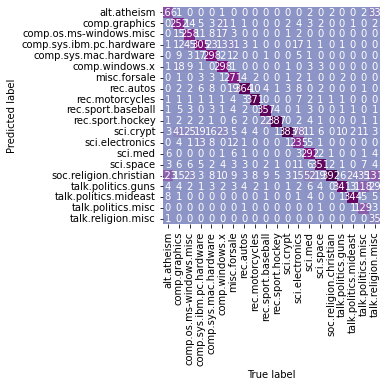

In [22]:
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T,cmap='BuPu',center=0,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [24]:
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [25]:
predict_category('Comet is going to be visible after 50,000 years')

'sci.space'

In [26]:
predict_category('Religious procession turned tragic')

'soc.religion.christian'